In [32]:
import pymssql, pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [4]:
# 建立連線通道(本機的 WINDOWS 驗證，需要用pyodbc)
conn = pyodbc.connect("DRIVER={SQL Server};SERVER=(local);DATABASE=MLDATASET")

In [5]:
# 資料庫資料撈取語法
SqlStr = "select * from WHOLESALE_UNSUPERVISED"

In [6]:
# 透過 pandas 撈取資料
wh = pd.read_sql(sql=SqlStr, con=conn)

In [7]:
df = wh.copy()

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [ ]:
# 集群分析

In [9]:
df['Channel'] = df['Channel'].astype('O')
df['Region'] = df['Region'].astype('O')

In [10]:
df.dtypes

Channel              object
Region               object
Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object

In [11]:
mn = MinMaxScaler()

In [15]:
df = pd.get_dummies(df)

In [18]:
df = pd.DataFrame(mn.fit_transform(df), columns=df.columns)

In [ ]:
KMeans()

In [19]:
# 撰寫 ELBOW METHOD 程式
def ELBOW(data, n = 10):
    elbow = []
    for i in range(1, n+1):
        kmclu = KMeans(n_clusters=i)
        kmclu.fit(df)
        elbow.append(kmclu.inertia_)
    return elbow

In [21]:
elbow_list = ELBOW(df)

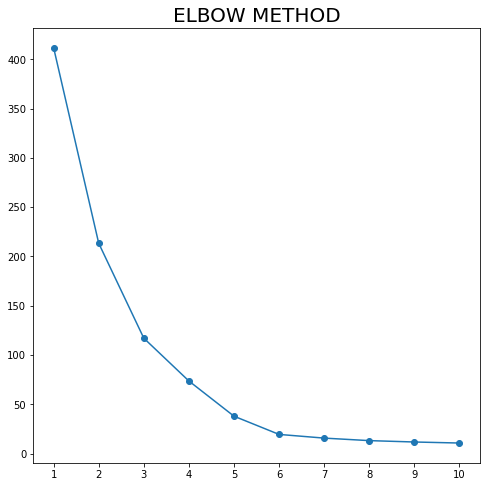

In [31]:
# ELBOW 繪圖
plt.figure(figsize=[8,8])
plt.title('ELBOW METHOD', size = 20)
plt.plot(range(1,11),elbow_list, marker = 'o')
plt.xticks(range(1,11,1))
plt.show()

In [36]:
kmclu_5 = KMeans(n_clusters=5)
kmclu_5.fit(df)

kmclu_6 = KMeans(n_clusters=6)
kmclu_6.fit(df)

print('N_5', silhouette_score(df, kmclu_5.labels_))
print('N_6', silhouette_score(df, kmclu_6.labels_))

N_5 0.8139267553776266
N_6 0.8486555986404499


In [38]:
# TSNE 繪圖
sne = TSNE()

In [39]:
sne_df = sne.fit_transform(df)

In [41]:
c5 = {0:'r', 1:'g', 2:'b', 3:'y', 4:'k'}
c6 = {0:'r', 1:'g', 2:'b', 3:'y', 4:'k', 5:'m'}

In [43]:
c5_color = [c5.get(i) for i in kmclu_5.labels_]
c6_color = [c6.get(i) for i in kmclu_6.labels_]

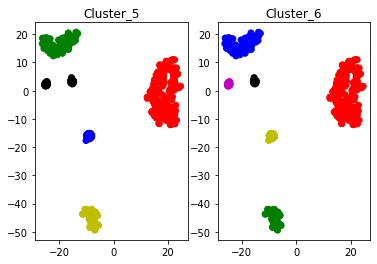

In [47]:
plt.subplot(1,2,1)
plt.title('Cluster_5')
plt.scatter(sne_df[:,0], sne_df[:,1], color = c5_color)

plt.subplot(1,2,2)
plt.title('Cluster_6')
plt.scatter(sne_df[:,0], sne_df[:,1], color = c6_color)